In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [37]:
display (os.getcwd())

'D:\\Projects\\Zomato DA'

In [38]:
os.chdir('D:\\Projects\\Zomato DA')
df = pd.read_csv('Zomato data.csv')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


We will change the datatype of 'rate' column to float and will remove the denominator

In [39]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

df['rate'] = df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


Summary of dataframe

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


We will check for null values

In [41]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

As we can see that there is no null value in dataframe.

Let's explore the listed_in(type) column

Text(0.5, 0, 'Type of Restaurant')

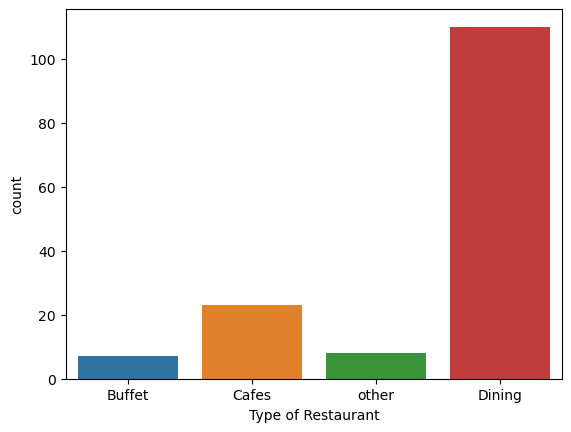

In [42]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Type of Restaurant')              

The majority of the reastaurants fall into the dining category.

Text(0, 0.5, 'Votes')

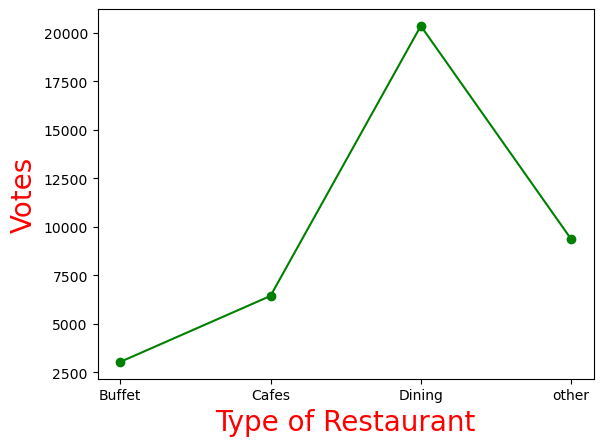

In [43]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of Restaurant', c='red', size=20)
plt.ylabel('Votes', c='red', size=20)

Upper chart shows us that Dining Restaurants are preferred by a larger number of individuals.

Now we will determine the restaurant's name that recieved the maximum votes based on a given dataframe.

In [44]:
max_votes = df['votes'].max()
rest_with_max_votes = df.loc[df['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(rest_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


Now we will explore the online_order column

<Axes: xlabel='online_order', ylabel='count'>

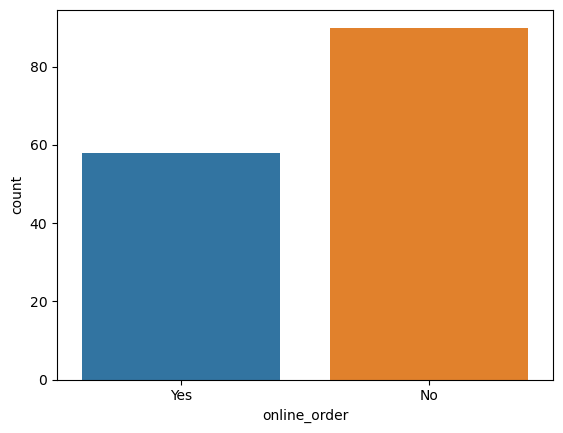

In [45]:
sns.countplot(x=df['online_order'])

This shows that most of the restaurants do not accept online orders.

Let's explore the rate column.

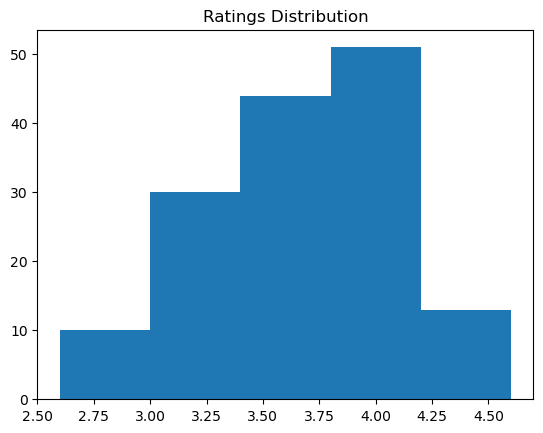

In [46]:
plt.hist(df['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

This shows that majority of restaurants recieved ratings ranging from 3.5 to 4.

Let's explore the approx_cost(for two people) column.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

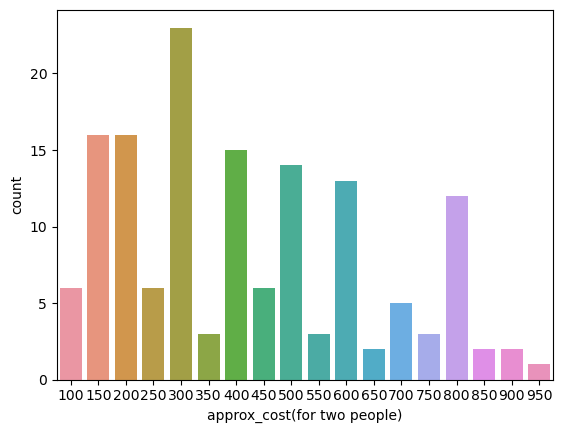

In [47]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

The majority of couples prefer restaurants with an approx cost of Rs. 300.

Now, we will examine whether online orders recieve higher ratings than offline orders.

<Axes: xlabel='online_order', ylabel='rate'>

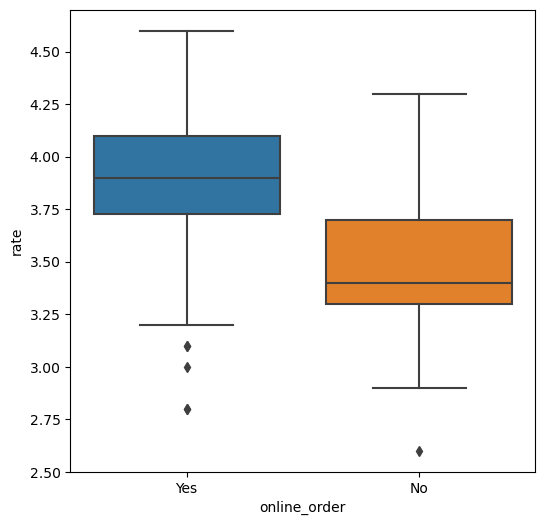

In [48]:
plt.figure(figsize = (6,6))
sns.boxplot(x= 'online_order', y = 'rate', data = df)

Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

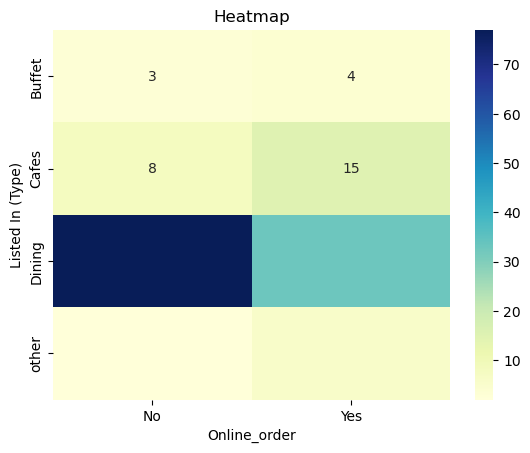

In [50]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online_order')
plt.ylabel('Listed In (Type)')
plt.show()

Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.

Project Objective:
1. Uncover restaurant trends and customer preferences by analyzing Zomato’s extensive dataset.2. 
Learn to clean, visualize, and interpret data for actionable insights.

Project Findings:
1. The majority of the reastaurants fall into the dining category.
2. Dining Restaurants are preferred by a larger number of individuals.
3. Most of the restaurants do not accept online orders.
4. Majority of restaurants recieved ratings ranging from 3.5 to 4.
5. The majority of couples prefer restaurants with an approx cost of Rs. 300.
6. Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.
7. Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.